In [1]:
import librosa
import librosa.display
import os
import numpy as np
import math
import re 

# Load DataSet Files name

In [2]:
torgoPath = r"E:\tergo dataset\data and labels" # DataSet path update it 

torgoallMainFolders= sorted(os.listdir(torgoPath)) #[f_audio,f_label,m_audio,m_label]
allDataFilesInTorgo =[File for Folder in torgoallMainFolders for File in sorted(os.listdir(torgoPath + '/' + Folder)) if re.search('_audio',Folder)] #get all wav files in one list
allLabelFilesInTorgo=[File for Folder in torgoallMainFolders for File in sorted(os.listdir(torgoPath + '/' + Folder)) if re.search('_label',Folder)] #get all txt files in one list

allWavesInDataAsNumpyArray = []
allLabelsInDatasetAsText= []
allReadErrorsFilesInDataset = []
mfccFeaturesAsNumpyArray = []

In [3]:
print(len(allDataFilesInTorgo))
print(len(allLabelFilesInTorgo))
print('first data file',allDataFilesInTorgo[0],'last data file',allDataFilesInTorgo[-1])
print('first label file',allLabelFilesInTorgo[0],'last label file',allLabelFilesInTorgo[-1])

9433
9433
first data file F1_S1_0001.wav last data file MC4_S2_1027.wav
first label file F1_S1_0001.txt last label file MC4_S2_1027.txt


# set variables as default values 

In [4]:
num_segments=5
hop_length=512
n_fft=2048
num_mfcc=13
SAMPLE_RATE = 16000
AUDIO_DURATION = 10 # measured in seconds
SAMPLES_PER_AUDIO = SAMPLE_RATE * AUDIO_DURATION
samples_per_segment = int(SAMPLES_PER_AUDIO / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)



# Extract signal and mfcc feature form waves

In [10]:
%%time
for dataFile in allDataFilesInTorgo: # all wave files
    print(dataFile)
    try:
        if re.search('F',dataFile): #get f_audio to get path of f_audio file
            signal, sample_rate = librosa.load(torgoPath + '/f_audio/'+ dataFile , sr = SAMPLE_RATE , duration =  AUDIO_DURATION , res_type='kaiser_fast')  #get signals and sampleRate in ane wave (dataFile) if name of dataFile have F
        elif re.search('M',dataFile) : #get m_audio to get path of m_audio file
            signal, sample_rate = librosa.load(torgoPath + '/m_audio/'+ dataFile , sr = SAMPLE_RATE , duration =  AUDIO_DURATION , res_type='kaiser_fast') #get signals and sampleRate in ane wave (dataFile) if name of dataFile have M
        actuallyDuration = librosa.get_duration(y=signal, sr=sample_rate)  #get actually duration of wav   
        mfccs = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T,axis=0)  #get mfcc array featture for one wave   
    except Exception as e:
        allReadErrorsFilesInDataset.append(wav) #collect name of file that have error to find it
    feature = np.array(mfccs).reshape([-1,1]) #get mfcc array featture for one wave after reshape it
    mfccFeaturesAsNumpyArray.append(feature)  #apeend featture array to get list of all waves feature                       
    allWavesInDataAsNumpyArray.append(signal) #apeend signal array to get list of all waves signals

F1_S1_0001.wav
F1_S1_0002.wav
F1_S1_0003.wav
F1_S1_0004.wav
F1_S1_0005.wav
F1_S1_0006.wav
F1_S1_0007.wav
F1_S1_0008.wav
F1_S1_0009.wav
F1_S1_0010.wav
F1_S1_0011.wav
F1_S1_0012.wav
F1_S1_0013.wav
F1_S1_0014.wav
F1_S1_0015.wav
F1_S1_0016.wav
F1_S1_0017.wav
F1_S1_0018.wav
F1_S1_0019.wav
F1_S1_0020.wav
F1_S1_0021.wav
F1_S1_0022.wav
F1_S1_0023.wav
F1_S1_0024.wav
F1_S1_0025.wav
F1_S1_0026.wav
F1_S1_0027.wav
F1_S1_0028.wav
F1_S1_0029.wav
F1_S1_0030.wav
F1_S1_0031.wav
F1_S1_0032.wav
F1_S1_0033.wav
F1_S1_0034.wav
F1_S1_0035.wav
F1_S1_0036.wav
F1_S1_0037.wav
F1_S1_0038.wav
F1_S1_0039.wav
F1_S1_0040.wav
F1_S1_0041.wav
F1_S1_0042.wav
F1_S1_0043.wav
F1_S1_0044.wav
F1_S1_0045.wav
F1_S1_0046.wav
F1_S1_0047.wav
F1_S1_0048.wav
F1_S1_0049.wav
F1_S1_0050.wav
F1_S1_0051.wav
F1_S1_0052.wav
F1_S1_0053.wav
F1_S1_0054.wav
F1_S1_0057.wav
F1_S1_0058.wav
F1_S1_0059.wav
F1_S1_0060.wav
F1_S1_0061.wav
F1_S1_0062.wav
F1_S1_0063.wav
F1_S1_0064.wav
F1_S1_0065.wav
F1_S1_0066.wav
F1_S1_0067.wav
F1_S1_0068.wav
F1_S1_0069

# Extract signal and mfcc feature form waves

In [13]:
%%time 
for labelFile in allLabelFilesInTorgo:  # all txt files
    if re.search('F',labelFile): #get f_audio to get path of f_audio file
        with open(torgoPath+'/f_label/'+labelFile, "r") as labelTextFile: # open label file
            allLabelsInDatasetAsText.append(labelTextFile.read().strip()) #get labels text in one list without duple spaces or \n
            print(labelFile)
    elif re.search('M',labelFile):#get m_audio to get path of m_audio file
        with open(torgoPath+'/m_label/'+labelFile, "r") as labelTextFile:# open label file
            allLabelsInDatasetAsText.append(labelTextFile.read().strip())#get labels text in one list without duple spaces or \n
            print(labelFile)

F1_S1_0001.txt
F1_S1_0002.txt
F1_S1_0003.txt
F1_S1_0004.txt
F1_S1_0005.txt
F1_S1_0006.txt
F1_S1_0007.txt
F1_S1_0008.txt
F1_S1_0009.txt
F1_S1_0010.txt
F1_S1_0011.txt
F1_S1_0012.txt
F1_S1_0013.txt
F1_S1_0014.txt
F1_S1_0015.txt
F1_S1_0016.txt
F1_S1_0017.txt
F1_S1_0018.txt
F1_S1_0019.txt
F1_S1_0020.txt
F1_S1_0021.txt
F1_S1_0022.txt
F1_S1_0023.txt
F1_S1_0024.txt
F1_S1_0025.txt
F1_S1_0026.txt
F1_S1_0027.txt
F1_S1_0028.txt
F1_S1_0029.txt
F1_S1_0030.txt
F1_S1_0031.txt
F1_S1_0032.txt
F1_S1_0033.txt
F1_S1_0034.txt
F1_S1_0035.txt
F1_S1_0036.txt
F1_S1_0037.txt
F1_S1_0038.txt
F1_S1_0039.txt
F1_S1_0040.txt
F1_S1_0041.txt
F1_S1_0042.txt
F1_S1_0043.txt
F1_S1_0044.txt
F1_S1_0045.txt
F1_S1_0046.txt
F1_S1_0047.txt
F1_S1_0048.txt
F1_S1_0049.txt
F1_S1_0050.txt
F1_S1_0051.txt
F1_S1_0052.txt
F1_S1_0053.txt
F1_S1_0054.txt
F1_S1_0057.txt
F1_S1_0058.txt
F1_S1_0059.txt
F1_S1_0060.txt
F1_S1_0061.txt
F1_S1_0062.txt
F1_S1_0063.txt
F1_S1_0064.txt
F1_S1_0065.txt
F1_S1_0066.txt
F1_S1_0067.txt
F1_S1_0068.txt
F1_S1_0069

In [14]:
print(allLabelsInDatasetAsText[:20])
print(len(allLabelsInDatasetAsText),'\n\n')
# print(allWavesInDataAsNumpyArray[0])
print(len(allWavesInDataAsNumpyArray),'\n\n')
print(allReadErrorsFilesInDataset)


['[say Ah-P-Eee repeatedly]', '[say Ah-P-Eee repeatedly]', '[say Pah-Tah-Kah repeatedly]', '[say Eee-P-Ah repeatedly]', '[relax your mouth in its normal position]', 'stick', 'tear [as in tear up that paper]', 'Except in the winter when the ooze or snow or ice prevents,', 'pat', 'up', 'meat', 'meat', 'know', 'he slowly takes a short walk in the open air each day.', 'air', 'swarm', 'double', 'no', 'storm', 'Usually minus several buttons.']
9433 


9433 


[]


In [15]:
print(mfccFeaturesAsNumpyArray[0])
print(len(mfccFeaturesAsNumpyArray))

[[-224.21306   ]
 [  72.94931   ]
 [ -14.522216  ]
 [ -16.339384  ]
 [ -25.01845   ]
 [ -23.227848  ]
 [  -7.672507  ]
 [  -8.478442  ]
 [ -11.233618  ]
 [   5.487371  ]
 [  -3.032888  ]
 [  -3.3023393 ]
 [  -2.489651  ]
 [  -8.348123  ]
 [ -16.205877  ]
 [   0.42632574]
 [  -6.665788  ]
 [  -2.8840282 ]
 [  -6.6221347 ]
 [ -10.456499  ]
 [  -3.6583593 ]
 [  -1.242584  ]
 [ -15.98888   ]
 [   4.2269654 ]
 [   8.152516  ]
 [  14.13198   ]
 [   6.8732743 ]
 [   9.226517  ]
 [   5.1542954 ]
 [  -0.7964235 ]
 [  -6.302062  ]
 [  -0.25740403]
 [  -2.2581935 ]
 [  -1.2106955 ]
 [  -7.3542933 ]
 [  -0.7877622 ]
 [  -6.013841  ]
 [  -1.7744093 ]
 [  -5.426818  ]
 [  -2.8802128 ]]
9433


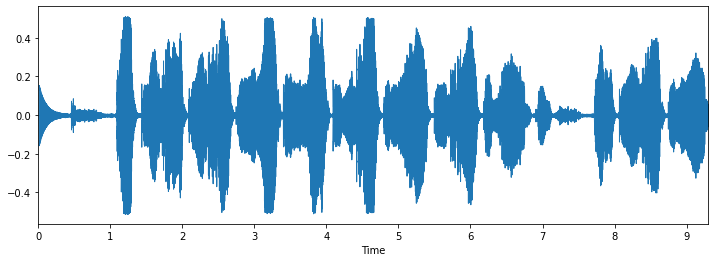

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
librosa.display.waveplot(allWavesInDataAsNumpyArray[0], sr = sample_rate )

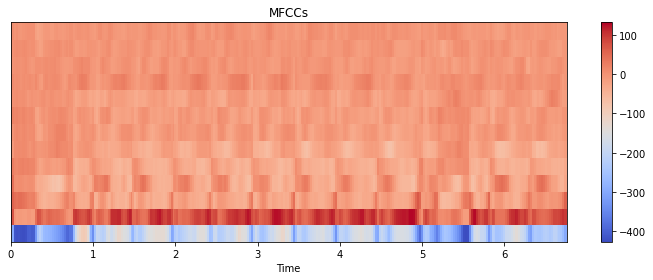

In [17]:
MFCCs = librosa.feature.mfcc(allWavesInDataAsNumpyArray[0], sample_rate, n_mfcc=13)
# display MFCCs
plt.figure(figsize=(10,4))
librosa.display.specshow(MFCCs, x_axis = 'time')
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()

In [18]:
MFCCs = librosa.feature.mfcc(allWavesInDataAsNumpyArray[0], sample_rate, n_mfcc=13)
MFCCs = MFCCs.T
print(MFCCs)

[[-2.53023895e+02  8.79376450e+01  4.96896515e+01 ...  2.04245806e+00
  -5.27361035e-01  1.12335739e+01]
 [-2.98888184e+02  7.42969666e+01  5.92756157e+01 ...  2.75989652e+00
   3.79270291e+00  7.43510628e+00]
 [-4.15626770e+02 -2.58615732e+00  4.66258316e+01 ...  3.92027140e+00
   9.39003181e+00  1.10144722e+00]
 ...
 [-2.42735489e+02  9.91007690e+01  8.90728188e+00 ...  7.04494333e+00
  -1.51766014e+01 -6.90137386e+00]
 [-2.64057281e+02  1.07377914e+02  2.99488049e+01 ... -6.05578423e-02
  -6.94905043e+00 -7.46702099e+00]
 [-2.97669220e+02  9.95014648e+01  5.83330002e+01 ... -5.35106850e+00
  -3.99188662e+00 -5.59382820e+00]]


In [19]:
X = np.array(mfccFeaturesAsNumpyArray)
print(X.shape)

(9433, 40, 1)


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(allLabelsInDatasetAsText)
classes = list(le.classes_)
print(y.shape)

(9433,)


In [21]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = len(allLabelsInDatasetAsText))
y = np.array(y)  
print(y.shape)

Using TensorFlow backend.
(9433, 9433)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation , Flatten , LSTM, Input
from keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
# Building LSTM model :
model_LSTM = Sequential()
model_LSTM.add(LSTM(units = 50 ,dropout = 0.05 , recurrent_dropout = 0.2 ,input_shape =(x_train.shape[1:])))
model_LSTM.add(Dense(485,activation = 'softmax'))
model_LSTM.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 485)               24735     
Total params: 35,135
Trainable params: 35,135
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_LSTM.fit(x_train,y_train,epochs = 100 ,batch_size = 120)
score = model_LSTM.evaluate(x_test,y_test)